# Diabetes Prediction using Logistic Regression

Importing Required Libraries

In [2]:
# EDA
## Analysis
import pandas as pd
import numpy as np
## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#-------------------------------------------------
# Machine Learning
## Preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

## Models and Evaluation
from sklearn.linear_model import LinearRegression, LogisticRegression
### Regression
from sklearn.metrics import mean_squared_error, r2_score # Evaluation Regression model only
### Classification
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score # Evaluation Classification model only

In [3]:
df = pd.read_csv('./diabetes_prediction_dataset.csv')
# X = df.drop(columns=['diabetes'])
# Y = df['diabetes']
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [4]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [5]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [6]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
df.duplicated().sum()

3854

In [9]:
df=df.drop_duplicates()
df.duplicated().sum()

0

Explore Categorical Columns Values

In [10]:
for col in ['gender', 'smoking_history' ]:
    print(f"{col}: {sorted(df[col].unique())}")

gender: ['Female', 'Male', 'Other']
smoking_history: ['No Info', 'current', 'ever', 'former', 'never', 'not current']


In [11]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [12]:
df.gender.value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [13]:
df = df[df['gender'] != 'Other']

Mapping Categorical Columns

In [14]:
# gender_map = {  
#               "Female": 0, 
#               "Male": 1,  
#               "Other":2
#               }
# smoking_history_map = {
#                         'No Info':0,
#                         'current':1,
#                         'ever':2,
#                         'former':3,
#                         'never':4,
#                         'not current':5
#                     }


In [15]:
# df['gender_encoded'] = df['gender'].map(gender_map)
# df['smoking_history_encoded'] = df['smoking_history'].map(smoking_history_map)

In [16]:
le = LabelEncoder()

df['gender_encoded'] = le.fit_transform(df['gender'])
print(le.classes_)  # Shows the order of classes, e.g., ['Female', 'Male', 'other']


['Female' 'Male']


In [17]:
df['smoking_history_encoded'] = le.fit_transform(df['smoking_history'])
print(le.classes_)  

['No Info' 'current' 'ever' 'former' 'never' 'not current']


In [18]:
df.head(2)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,0,0,4
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,0


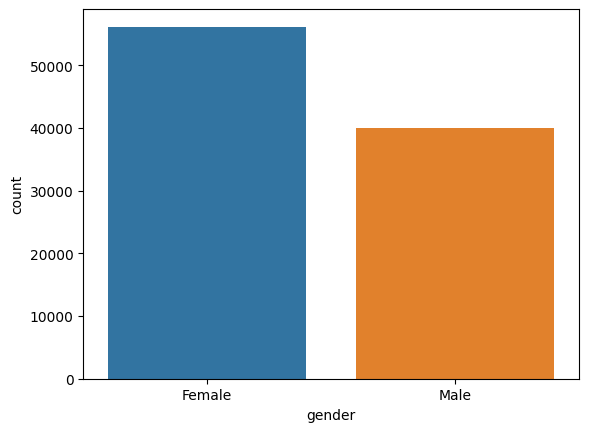

In [19]:
# Using countplot
sns.countplot(x='gender', data=df)
plt.show()


In [20]:
df.head(2)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,0,0,4
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,0


In [21]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes',
       'gender_encoded', 'smoking_history_encoded'],
      dtype='object')

Features and Target Columns

In [22]:
X = df.drop(columns=['diabetes','gender', 'smoking_history'])
Y = df['diabetes']

In [36]:
# correlation_matrix = X.apply(lambda col: Y.corr(col))
# print(correlation_matrix)

In [ ]:
correlation_matrix = df.drop(columns=['gender', 'smoking_history']).corr()
print(correlation_matrix['diabetes'].sort_values(ascending=False))


diabetes                   1.000000
blood_glucose_level        0.424366
HbA1c_level                0.406446
age                        0.264918
bmi                        0.214951
hypertension               0.195696
heart_disease              0.170701
smoking_history_encoded    0.088509
gender_encoded             0.037837
Name: diabetes, dtype: float64


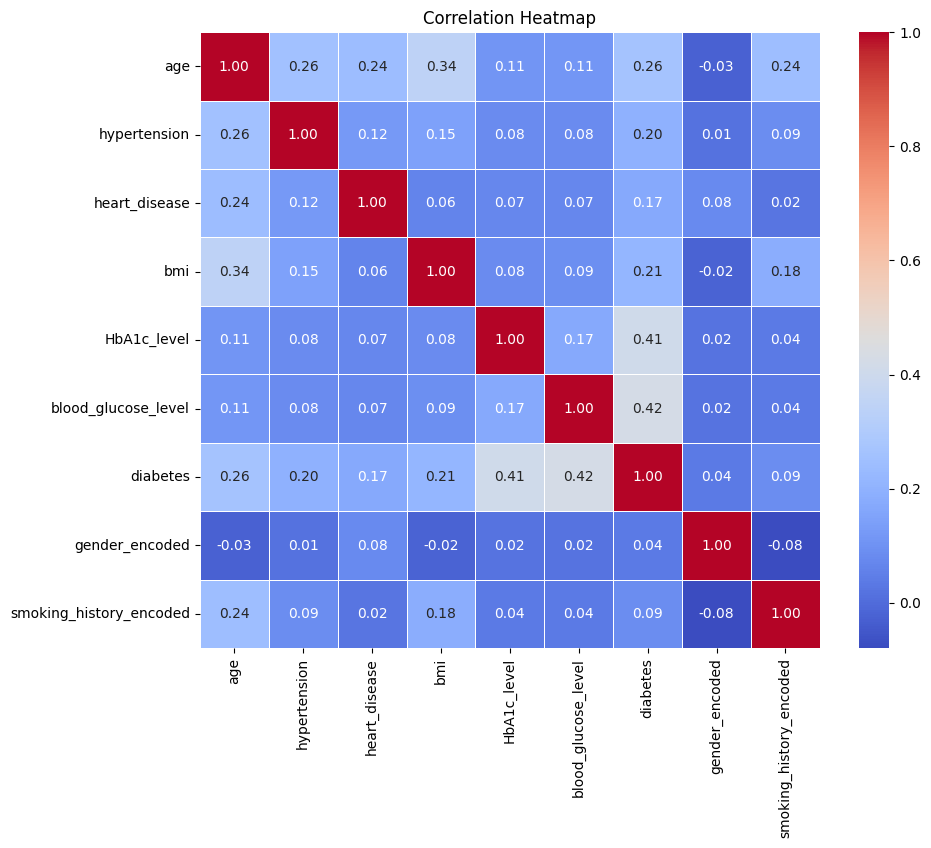

In [53]:
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

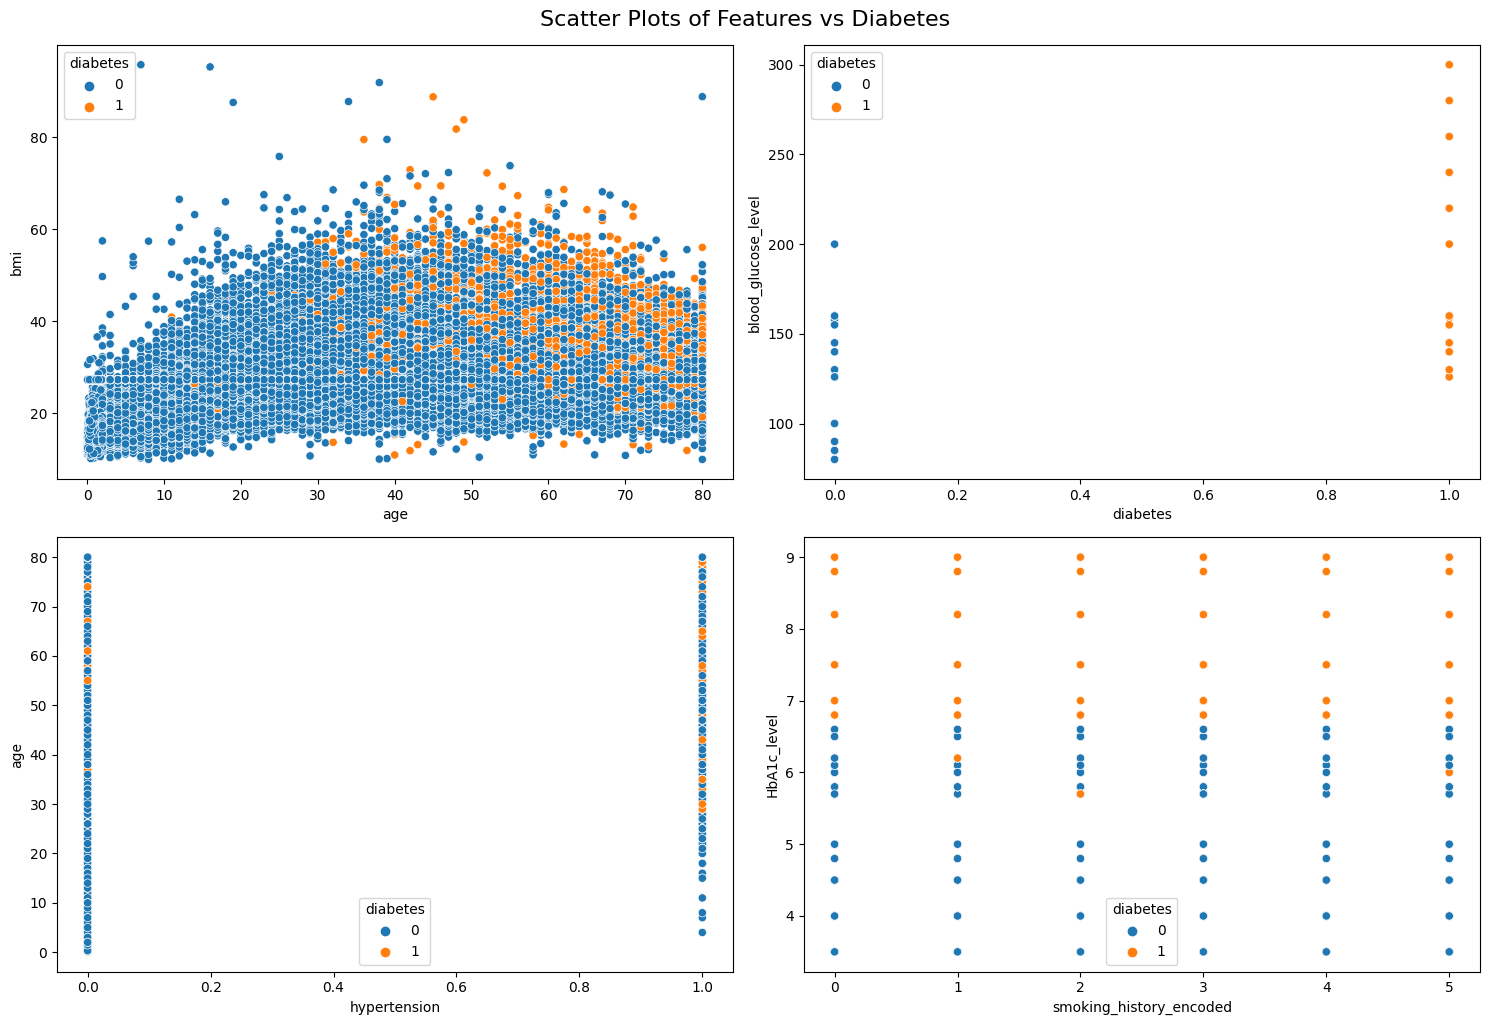

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10),)

sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df, ax=ax[0, 0])
sns.scatterplot(x='diabetes', y='blood_glucose_level',hue='diabetes',  data=df, ax=ax[0, 1])
sns.scatterplot(x='hypertension', y='age', hue='diabetes', data=df, ax=ax[1, 0])
sns.scatterplot(x='smoking_history_encoded', y='HbA1c_level', hue='diabetes', data=df, ax=ax[1, 1])
plt.tight_layout()
plt.suptitle('Scatter Plots of Features vs Diabetes', fontsize=16, y=1.02)

plt.show()

💡 Diabetes occurrence When blood glucose level is above 125 mg/dl

In [73]:
np.sort(df[df['diabetes'] == 1]['blood_glucose_level'].unique())

array([126, 130, 140, 145, 155, 159, 160, 200, 220, 240, 260, 280, 300],
      dtype=int64)

| HbA1c (%) | Interpretation |
| --------- | -------------- |
| <5.7%     | Normal         |
| 5.7%–6.4% | Prediabetes    |
| ≥6.5%     | Diabetes       |


In [74]:
np.sort(df[df['diabetes'] == 1]['HbA1c_level'].unique())

array([5.7, 5.8, 6. , 6.1, 6.2, 6.5, 6.6, 6.8, 7. , 7.5, 8.2, 8.8, 9. ])

Train Test split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

Model Training

In [25]:
model = LogisticRegression()
model.fit(X_train, Y_train)

e:\packages\Anaconda3\envs\ydata_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
Y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", round(accuracy_score(Y_test, Y_pred), 3)*100 , "%")


Accuracy: 95.7 %


In [76]:
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     17547
           1       0.87      0.60      0.71      1679

    accuracy                           0.96     19226
   macro avg       0.92      0.80      0.84     19226
weighted avg       0.95      0.96      0.95     19226

